# Laboratorio 3: Clasificación



Integrantes:
- Nicolás Arancibia (sección 1)
- Daye Kang (sección 1)

## Declaración de compromiso ético

Nosotros/as **Nicolás Arancibia, Daye Kang**, declaramos que realizamos de manera grupal los pasos de la presente actividad. También declaramos no incurrir en copia, ni compartir nuestras respuestas con otras personas ni con otros grupos. Por lo que, ratificamos que las respuestas son de nuestra propia confección y reflejan nuestro propio conocimiento.

## Instrucciones

1. Trabajen en equipos de dos personas.

2. Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda.

3. El formato de entrega para esta actividad es un archivo **html**. Genere un archivo HTML usando jupyter y súbalo a U-Cursos. Basta con que **uno de los integrantes haga la entrega**. Si ambos hacen una entrega en U-Cursos, se revisará cualquiera de éstas.


A continuación vamos a cargar un dataset con noticias, el cual se puede encontrar en: https://www.kaggle.com/datasets/kevinmorgado/spanish-news-classification.

Los atributos que posee son:

- URL : El link a la noticia
- News: El texto de la noticia
- Type: La clasificación de la noticia


Para el laboratoria solo nos importan las columnas News y Type.


In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/mzambrano1/Datasets-CC5205-otono-2023/master/lab2.1/noticias.csv")
df = df[["news", "Type"]]
df = df.rename(columns={
    'news': 'Noticia', 'Type':'Clasificación'})
df.head()


,Noticia,Clasificación
0,Durante el foro La banca articulador empresari...,Otra
1,El regulador de valores de China dijo el domin...,Regulaciones
2,En una industria históricamente masculina como...,Alianzas
3,Con el dato de marzo el IPC interanual encaden...,Macroeconomia
4,Ayer en Cartagena se dio inicio a la versión n...,Otra


A continuación preprocesaremos los textos y los convertiremos en vectores. Esto con el propósito de tener información numérica que pueda ser interpretable por los modelos que crearemos después.


In [2]:
import requests
import re
import string
from sklearn.feature_extraction.text import CountVectorizer

def remove_numbers(text):
    text = re.sub(r"[0-9]", " ", text)
    return " ".join(text.split())

def remove_unprintable_(text):
    printable = set(string.printable + "ñáéíóúü" + "ÑÁÉÍÓÚÜ")
    text = "".join(filter(lambda x: x in printable, text))
    return text

def remove_punctuation(text):
    pattern = re.compile(r"[^\w\sáéíóúüñÁÉÍÓÚÜÑ]")
    t = pattern.sub(r" ", text)
    return re.sub(" +", " ", t)

def reduce_spam(text):
    text = re.sub(r"(\w+)(\s+\1){2,}", r"\1", text)
    text = re.sub(r"(\w+\s+\w+)(\s+\1){2,}", r"\1", text)
    return text

def remove_vowels_accents(text):
    return (
        text.replace("á", "a")
        .replace("é", "e")
        .replace("í", "i")
        .replace("ó", "o")
        .replace("ú", "u")
        .replace("ü", "u")
    )

def remove_stopwords(text, stopwords_list):
    return " ".join(
        [word for word in str(text).split() if word not in stopwords_list]
    )

url = "https://raw.githubusercontent.com/Alir3z4/stop-words/master/spanish.txt"
r = requests.get(url)

stopwords_list = r.text.splitlines()

def preprocesar(text):
    text = text.lower()
    text = remove_numbers(text)
    text = remove_unprintable_(text)
    text = remove_punctuation(text)
    text = reduce_spam(text)
    text = remove_stopwords(text, stopwords_list)
    text = remove_vowels_accents(text)
    return text.strip()


# Extraer los vectores
vectorizer = CountVectorizer(preprocessor=preprocesar, min_df=2)
vectors = vectorizer.fit_transform(df["Noticia"])

# Incorporar los vectores como dataframe
X = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out())
y = df["Clasificación"]

df_vectorizado = pd.concat([y, X], axis=1)
df_vectorizado.head()


,Clasificación,aa,aaa,abacum,abajo,abandonar,abandono,abanico,abaratamiento,abaratar,...,zero,zhao,zijin,zmvm,zona,zonas,zuckerberg,zug,zuluaga,zurich
0,Otra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Regulaciones,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alianzas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Macroeconomia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Otra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Pregunta 1

Cargue los datos e indique lo siguiente:

- Tamaño del dataset vectorizado (cantidad de instancias y atributos).
- ¿Cuántas clases hay en la columna "Clasificación" y cuáles son sus nombres?
- ¿Cuántas instancias hay en cada clase?

Indique en cada caso cómo obtuvo la respuesta, es decir, adjunte código.


In [3]:
df_vectorizado.shape

(1217, 14407)

In [4]:
df_vectorizado.Clasificación.value_counts()

Clasificación
Macroeconomia     340
Alianzas          247
Innovacion        195
Regulaciones      142
Sostenibilidad    137
Otra              130
Reputacion         26
Name: count, dtype: int64

1. Son 1217 instancias y 14407 atributos.
2. Hay 7 clases en la columna "Clasificación", son Macroeconomia, 
Alianza, 
Innovaci, 5
Regulacio, 42
Sostenibil, 137 y  130
Repu
3. tEn Macroeconomía hay 340 instancias, en Alianzas 247 instancias, en Innovacion hay 195 instancias, en Regulaciones hay 142 instancias,
   en Sostenibilidad hay 137 instancias, en Otra hay 130 instancias, y en Reputacion hay 26 instancias.acion 

### Pregunta 2


En esta parte useremos el clasificador **Naive Bayes**. Veremos distintas formas de usarlo, y vamos a compararlas utilizando diversas métricas.


Usando el siguiente código, entrenaremos un clasificador con los datos cargados (X, y) y haremos una predicción sobre los mismos datos empleando dicho clasificador entrenado. Luego, se mostrarán las métricas de **accuracy**, **precision**, **recall** y **f1-score**.


In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

clf = GaussianNB()
clf.fit(X, y)
y_pred = clf.predict(X)

print(classification_report(y, y_pred))

                precision    recall  f1-score   support

      Alianzas       1.00      0.99      0.99       247
    Innovacion       1.00      1.00      1.00       195
 Macroeconomia       1.00      0.99      1.00       340
          Otra       0.98      1.00      0.99       130
  Regulaciones       0.99      1.00      1.00       142
    Reputacion       0.87      1.00      0.93        26
Sostenibilidad       1.00      0.99      1.00       137

      accuracy                           0.99      1217
     macro avg       0.98      1.00      0.99      1217
  weighted avg       0.99      0.99      0.99      1217



De acuerdo a los resultados obtenidos:

- ¿Qué opina sobre las predicciones?
- ¿Qué problema puede identificar?


**Respuesta:**
Opinamos que las predicciones tienen un muy alto índice de correctitud en las métricas, pero el problema que se puede identificar
es que no son realistas, pues se predicen resultados de los mismos datos utilizados para entrenar al clasificador, son resultados sesgados 
(overfitting).


### Pregunta 3


Ahora lo que haremos será dividir nuestro dataset en 70% entrenar (**_training set_**) y 30% para testear (**_testing set_**). Use la función **_train_test_split()_** de _sklearn_ y utilice las variables `X_train, X_test, y_train, y_test`.


Escriba el código necesario para dividir los datos, entrenar el modelo e indicar el **accuracy**, **precision** y **recall** del clasificador.

Entrene usando el **_training set_** y pruebe sobre el **_testing set_**, en base a la división 70%-30%, respectivamente

**NOTA: para dividir el dataset use el parámetro `stratify=y`.**


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30, stratify = y)

clf = GaussianNB()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

      Alianzas       0.55      0.62      0.58        74
    Innovacion       0.79      0.88      0.83        59
 Macroeconomia       0.72      0.87      0.79       102
          Otra       0.69      0.28      0.40        39
  Regulaciones       0.71      0.40      0.51        43
    Reputacion       0.60      0.38      0.46         8
Sostenibilidad       0.66      0.76      0.70        41

      accuracy                           0.68       366
     macro avg       0.67      0.60      0.61       366
  weighted avg       0.68      0.68      0.66       366



¿Qué opina sobre las predicciones obtenidas en la pregunta anterior?

Responda lo siguiente:

- Comparando los clasificadores de las preguntas 2 y 3 ¿Cuál tiene peores resultados? ¿Por qué?
- ¿Cuál de las dos formas de entrenar el clasificador prefiere? Justifique su respuesta


**Respuesta:**
El clasificador de la pregunta 3 tiene peores resultados, esto porque se realiza un trabajo de predicción a datos que no fueron utilizados
para entrenar al clasificador en sí, a difernecia del otro clasificador que los datos de entrenamiento y de test eran iguales.

Preferimos la última forma de entrenar al clasificador, pues así se tienen resultados no sesgados del entrenamiento previo (se obtienen resultados realistas), y así se puede corregir de buena forma el entrenamiento que se realiza. No preferimos la primera forma de entrenar porque de dicha forma no podemos saber con certeza que tan generalizado es el clasificador, pues solo se utilizan los datos de entrenamiento como datos para testear. 

### Pregunta 4

Grafique una matriz de confusión para los resultados de clasificación de la pregunta anterior. Interprete la matriz y comente sobre cada uno de los valores distintos de 0 en la matriz y describa lo que representa.

_Verifique que los resultados que se imprimen concuerden con su respuesta._


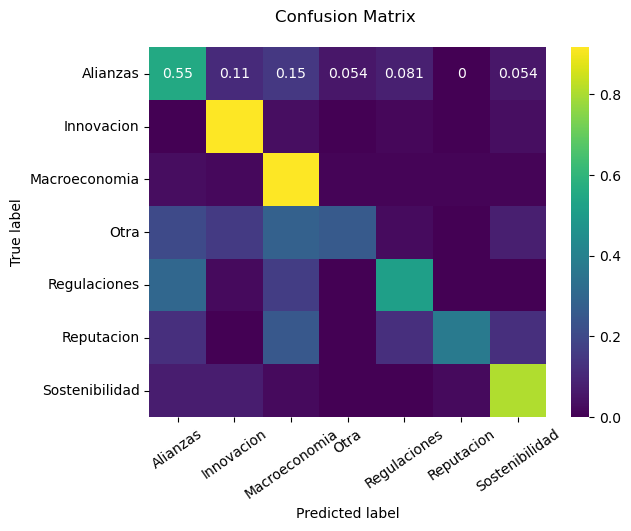

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

classes = unique_labels(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred, normalize='true')

fig, ax = plt.subplots()

ax = sns.heatmap(cm, annot=True, cmap="viridis")

ax.set_title('Confusion Matrix \n')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

ax.set_yticklabels(classes, rotation=0)
ax.set_xticklabels(classes, rotation=35)

plt.show()


# Escriba el código necesario para generar la matriz


**Respuesta:**

Los valores distintos a 0 que se encuentran fuera de la diagonal de clasificación son aquellas con clasificaciónes erroneas. Los valores mostrados tienen sentido con los valores de la pregunta anterior, puesto a que, como se puede ver, alianzas y sostenibilidad son aquellos que en la diagonal tienen valores más bajos (cuando en la diagonal deben ser cercanos a 1 para que la clasificación sea correcta) al igual que en los valores de la pregunta anterior. Al ver el mapa de color podemos ver qué clasificaciones suelen colarse a que otras clasificaciones, viendo los valores en donde el mapa de color sea más cercano a 1 fuera de la diagonal (por ejemplo se puede ver que varios datos que deber{ian ser clasificados como reputación son clasificados como alianza).

### Pregunta 5

Para este clasificador utilizaremos Cross-validation. Con cross-validation, el conjunto de entrenamiento se divide en $k$ conjuntos disjuntos; se entrena sobre los datos correspondientes a $k-1$ de éstos, y se evalúa sobre el conjunto restante. Esto se repite $k$ veces, evaluando siempre sobre un conjunto distinto. Teniendo en cuenta el parámetro $k$, a éste método se le llama $k$-fold cross-validation. Una forma de estimar el rendimiento del clasificador es, entre otras cosas, calculando el promedio de todos los k-folds.

Escriba un código que ejecute 10-fold cross-validation usando Naive Bayes sobre los datos, evaluando las métricas: 'precision_macro', 'recall_macro', 'accuracy', 'f1_macro'.


In [13]:
from sklearn.model_selection import cross_validate
import numpy as np

# Escriba su código aquí
scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']

cv_results = cross_validate(clf, X, y, cv=10, scoring=scoring)

print('Promedio Precision:', np.mean(cv_results['test_precision_macro']))
print('Promedio Recall:   ', np.mean(cv_results['test_recall_macro']))
print('Promedio Accucary: ', np.mean(cv_results['test_accuracy']))
print('Promedio F1-score: ', np.mean(cv_results['test_f1_macro']))

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Promedio Precision: 0.6959131981785224
Promedio Recall:    0.6278711168677997
Promedio Accucary:  0.7280788511041865
Promedio F1-score:  0.6379147434690406


- Compare los valores de las métricas con respecto a lo obtenido en la pregunta 3. Comente en qué difieren y por qué.
- ¿Qué beneficios tiene emplear cross-validation?



**Respuesta:**
Todas las métricas mejoraron con el cross-validation, esto porque en cross-validation ocurre que k veces (10 veces en este caso) k-1 subconjuntos de los datos se ocupan para entrenar, mientras que el restante se ocupa para testear, esto implica que todos los subconjuntos se utilizan para entrenar y testear. En cambio con Holdout, el 70% de los datos solo sirve para entrenar y el 30% para testear, provocando que datos que se utilizaron para un propósito no sean utilizados para el otro. En otras palabras, hay un mayor grado de entrenamiento en cross-validation que con Holdout.

Uno de los beneficios que tiene implementar cross-validation es el ya mencionado, esto principalmente porque el modelo se entrena un total de k veces, otro beneficio está ligado al usar cada subconjunto como test, esto hace que el entrenamiento realizado al modelo sea menos sesgado.


### Pregunta 6

Entrene otro clasificador distinto de Naive Bayes a su elección y evalue sus resultados de la forma que estime conveniente. Luego responda las siguentes preguntas:

- ¿En qué se diferencian ambos clasificadores? Considere tanto los resultados como los propios algoritmos
- ¿Cuál de los dos clasificadores le parece que es la mejor opción? Justifique su respuesta



In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30, stratify = y)

clf = DecisionTreeClassifier(criterion='gini', random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

      Alianzas       0.83      0.77      0.80        74
    Innovacion       0.70      0.88      0.78        59
 Macroeconomia       0.77      0.88      0.82       102
          Otra       0.76      0.72      0.74        39
  Regulaciones       0.76      0.67      0.72        43
    Reputacion       0.86      0.75      0.80         8
Sostenibilidad       0.83      0.49      0.62        41

      accuracy                           0.77       366
     macro avg       0.79      0.74      0.75       366
  weighted avg       0.78      0.77      0.77       366



**Respuesta:**
La principal diferencia entre ambos clasificadores es que, el clasificador de Naive Bayes se basa principalmente en la predicción mediante el uso de probabilidades obtenidas durante el entrenamiento, en cambio el clasificador del Árbol de decisión se basa en el concepto recursivo de "Divide y vencerás" para clasificar los datos de forma categórica usando la estructura de un árbol (raíz, nodos, y hojas). En cuanto a los resultados se puede decir que otra diferencia entre ambos modelos es que el árbol de decisión trabaja mejor con textos en los datos que el clasificador de Naive Bayes, esto porque los resultados de las métricas del árbol de decisión son mejores en general que los de Naive Bayes.

Nos parece mejor el árbol de decisión como modelo clasificador que el de Naive Bayes, esto porque sus resultados en cuanto a todas sus métricas de evaluación son mejores que la de Naive Bayes.

### Pregunta 7

Cuando hacemos clasificación en Data Mining queremos encontrar un patrón en los datos. Analice los atributos de los datos junto a los resultados obtenidos en la pregunta anteriores y describa sus principales observaciones. ¿Cómo se relacionan los atributos X con la clase de interés y? Es una pregunta abierta, puede apoyar su análisis con tablas y/o visualizaciones.

Los atributos x son las palabras utilizadas dentro de la noticia, mientras que la clase y son los tipos de noticias en las que se pueden clasificar. 
Al entrenar una clasificación se identifican qué atributos (x) suelen aparecer con más frecuencia en cada clase (y). En el gráfico de calor se puede
observar que claramente hay categorías que tienen atributos más específicos a ellos los cuales hacen que tengan una mejor clasificación (como Alianzas
y  Macroeconomía), mientras que existen otras categorías (como Sostenibilidad y otros) que tienden a tener atributos más generales o no específicos 
para su categoría lo que hace más común y probable que queden mal clasificados.